練習問題：
状態 |+⟩  と  |−⟩  で量子ビットをスワップする回路を作り、それが上記の回路（CNOTゲートの順序の変更した場合)と等価であることを示してください。

In [1]:
# Qiskit をインポートする
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

練習問題と等価となる「①CNOTゲートの順序を変更した場合」のSWAPゲートの回路は以下であった（テキストブックより引用）。

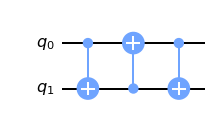

In [2]:
# aとbの値を準備
a = 0
b = 1
qc = QuantumCircuit(2)
# 量子ビットaとbの状態を入れ替える
qc.cx(a,b)  #1回目CNOT
qc.cx(b,a)  #2回目CNOT
qc.cx(a,b)  #3回目CNOT
qc.draw()

上記の回路について、数式を用いて示していく。　　

まず、$q_0, q_1$ の回路は数式で書くと
$$
\begin{align*}
q_0 \otimes q_1 &=\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)} \otimes \frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)}\\ 
&= \frac{1}{2}{(|0\rangle|0\rangle)}+\frac{1}{2}{|(|0\rangle|1\rangle)}+\frac{1}{2}{(|1\rangle|0\rangle)}+\frac{1}{2}{(|1\rangle|1\rangle)} \qquad -*式 　\\
\end{align*} 
$$


である。
さらに回路見ていくと、CNOTを複数回適用することで2つの量子ビット間の状態を移動し、量子状態を入れ替えているという事がわかる。

ではCNOTを複数回適用することで、量子状態が入れ替わっているのかを$*$ 式からも確認していく。

1回目CNOT 
\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\therefore \frac{1}{2}{(|0\rangle|0\rangle)} +\frac{1}{2}{(|0\rangle|1\rangle)} +\frac{1}{2}{(|1\rangle|1\rangle)} +\frac{1}{2}{(|1\rangle|0\rangle)}
\end{align*}
2回目CNOT
\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\therefore \frac{1}{2}{(|0\rangle|0\rangle)} +\frac{1}{2}{(|1\rangle|1\rangle)} +\frac{1}{2}{(|0\rangle|1\rangle)} +\frac{1}{2}{(|1\rangle|0\rangle)}
\end{align*}
3回目CNOT
\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\therefore \frac{1}{2}{(|0\rangle|0\rangle)} +\frac{1}{2}{(|1\rangle|0\rangle)} +\frac{1}{2}{(|0\rangle|1\rangle)} +\frac{1}{2}{(|1\rangle|1\rangle)} 
= q_1 \otimes q_0
\end{align*}

$＊$式と量子状態が入れ替わっていることが確認できた。

次に、①と等価である「②状態 |+⟩  と  |−⟩  で量子ビットをスワップする回路」を作成する。

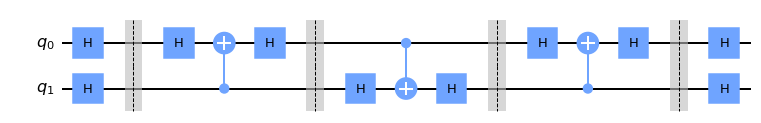

In [3]:
qc = QuantumCircuit(2)
# 量子ビットaとbの状態を入れ替える
qc.h(a)
qc.h(b)
qc.barrier() 
# 今回は回路を見やすくするためにバリアを入れる
# hで挟んでいるのは、CNOTの前後に正しい回転を配置することによってブロッホ球での角度πの任意の回転の制御バージョンに変更できる性質を利用しているため
qc.h(a)
qc.cx(b,a)  #1回目CNOT
qc.h(a)
qc.barrier()
qc.h(b)
qc.cx(a,b)  #2回目CNOT
qc.h(b)
qc.barrier()
qc.h(a)
qc.cx(b,a)  #3回目CNOT
qc.h(a)
qc.barrier()
qc.h(a)
qc.h(b)
qc.draw()

回路図から①と②は等価であることがわかった。


パラメータと回路図の内容を式を用いて解説していく。

まず、前提として$|+\rangle, |-\rangle$ は以下のように定義される。
$$
H|0\rangle 
=\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)} = |+\rangle , \\ 
H|1\rangle 
=\frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)} = |-\rangle \\
$$
このことより、
$$
|+\rangle \otimes  |-\rangle = \frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)}\otimes \frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)} 　－＊＊式
$$
となる。

また、$|+\rangle , |-\rangle$ にそれぞれHを適用すると以下となる性質を利用する。
$$
H|+\rangle=H\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)} = |0\rangle \\ H|-\rangle=H\frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)} = |1\rangle 
$$

＊＊式より、

$$
\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)}\otimes \frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)} = \frac{1}{2}{(|0\rangle|0\rangle)}-\frac{1}{2}{(|0\rangle|1\rangle)}+\frac{1}{2}{(|1\rangle|0\rangle)}-\frac{1}{2}{(|1\rangle|1\rangle)}
$$



1回目CNOT 

\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\therefore \frac{1}{2}{(|0\rangle|0\rangle)} -\frac{1}{2}{(|0\rangle|1\rangle)} +\frac{1}{2}{(|1\rangle|1\rangle)} -\frac{1}{2}{(|1\rangle|0\rangle)}
\end{align*}
2回目CNOT
\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{a},\rm{b})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\therefore \frac{1}{2}{(|0\rangle|0\rangle)} -\frac{1}{2}{(|1\rangle|0\rangle)} +\frac{1}{2}{(|1\rangle|1\rangle)} -\frac{1}{2}{(|0\rangle|1\rangle)}
\end{align*}
3回目CNOT
\begin{align*}
\frac{1}{2}{(|0\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|0\rangle)} \\ 
\frac{1}{2}{(|1\rangle|0\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|0\rangle)} \\
\frac{1}{2}{(|1\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|0\rangle|1\rangle)} \\
\frac{1}{2}{(|0\rangle|1\rangle)} \xrightarrow {CX(\rm{b},\rm{a})} \frac{1}{2}{(|1\rangle|1\rangle)} \\
\end{align*}
$$
\begin{align*}
\therefore &\frac{1}{2}{(|0\rangle|0\rangle)} -\frac{1}{2}{(|1\rangle|0\rangle)} +\frac{1}{2}{(|0\rangle|1\rangle)} -\frac{1}{2}{(|1\rangle|1\rangle)}　\\ 
&= \frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)}\otimes \frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)} \\
&= |-\rangle \otimes  |+\rangle
\end{align*}
$$

以上より、式からも＊＊式と量子状態が入れ替わることが確認でき、この結果は①と等価であるとも言える。